In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# La Serena Data Science School

# Classification

### Francisco Förster Burón

### CMM-U.Chile / MAS


![title](images/LSDSS.png)

# Overfitting, underfitting and the bias-variance trade-off


Two important ideas in machine learning are **overfitting** and **underfitting**.

If a model represents our data too accurately, it may not generalize well to unobserved data.

A popular solution to reduce overfitting  consists of adding structure to the model through **regularization**. This favors simpler models through training inspired by **Occam's razor**.

## Bias

It quantifies the precision of the model accross the training sets.

## Variance 

It quantifies how sensitive the model is to small changes in the training set.

![](images/biasvariance.png)

# Complexity, accuracy, robustness

In general, we want precise and robust models. 

**Simpler models tend to be less accurate, but more robust.**

**More complex models tend to be more accurate, but less robust.**

This tension is usually expressed as the **bias-variance trade-off** which is central to machine learning

# Model selection

No model performs uniformly better than the others. One model may perform better in one data set and badly on another.

# Classification vs regression

![](images/ml.png)

# Types of machine learning

# 1. Predictive or **supervised learning**:

Learn a mapping from inputs ${\bf x}$ to outputs $y$, given a **labeled** set of input-output pairs $D=\lbrace{({\bf x_i}, y_i)\rbrace}_{i=1}^N$.

$D$ is called the **training set**.
  
Each training input ${\bf x_i}$ is a vector of dimension $M$, with numbers called **features**, **attributes** or **covariates**. They are usually stored in a $N \times M$ **design matrix** ${\bf X}$.
    
### When $y$ is **categorical** the problem is known as **classification**.
    
### When $y$ is **real--valued** the problem is known as **regression**.

### Example training set: the iris data set

![title](images/iris.png)

![title](images/irises.png)

In [2]:
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")

dfIris = sns.load_dataset("iris")
print("Design matrix shape:", dfIris.shape)
print("Design matrix columns:", dfIris.columns)

Design matrix shape: (150, 5)
Design matrix columns: Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [3]:
dfIris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [4]:
dfIris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [5]:
dfIris.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

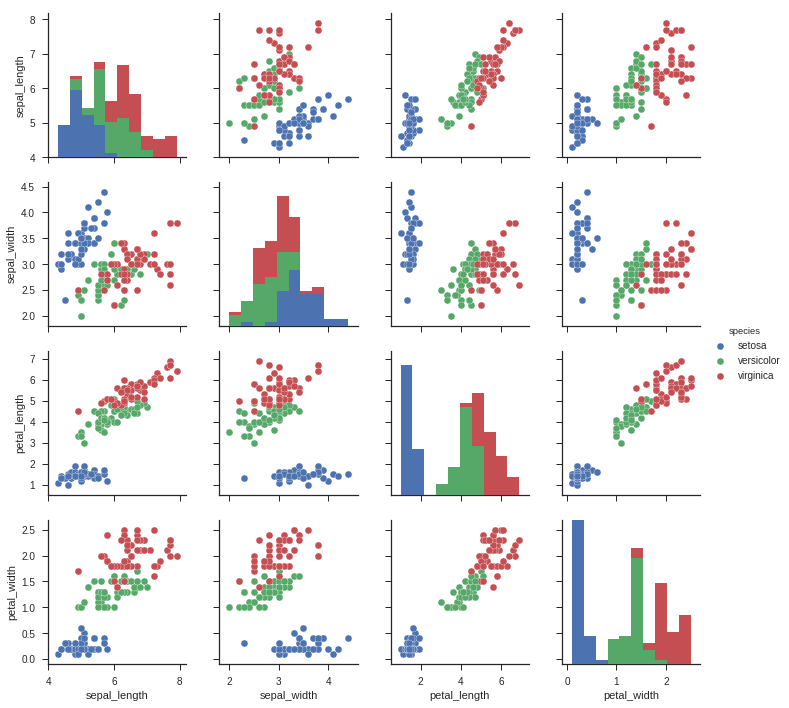

In [6]:
sns.pairplot(dfIris, hue="species");

# 2. Descriptive or **unsupervised learning**

Only inputs are given: $D=\lbrace{{\bf x_i}\rbrace}_{i=1}^N$
    
The goal is to find interesting patterns, which is sometimes called **knowledge discovery**
  
The problem is not always well defined: not clear what kind of pattern to look, no obvious metric to use (unlike supervised learning).




# 3. Reinforcement learning

Mixed between supervised and unsupervised. Only occasional reward or punishement signals are given (e.g. baby learning to walk)



# Supervised classification

## Classification loss

The most common loss function is the **zero-one** loss function:

$L(y, \hat y) = \delta(y \ne \hat y)$

where $\hat y$ is the best guess value of $y$

The **classification risk** of a model is the expectation value of the loss:

$E[L(y, \hat y)] = p(y \ne \hat y)$

For the zero-one loss function the risk is equal to the **misclassification rate** or **error rate**

# Accuracy

$\Large \rm accuracy = \frac{\#\ correct\ labels}{total}$

Note that this is one minus the classification risk.

# Types of errors

Accuracy and classification risk are not necessarily good diagnostics of the quality of a model. 

It is better to distinguish between two types of errors:

1. Assigning the label 1 to an object whose true class is 0 (a **false positive**)

2. Assigning the label 0 to an object whose true class is 1 (a **false negative**)

![](images/errors.jpg)

In [445]:
from IPython.display import HTML
HTML('<iframe width="900" height="500" src="https://www.youtube.com/embed/8YWl7tDGUPA" frameborder="0" allowfullscreen></iframe>')

# Diagnostics

# Completeness and contamination

$\Large \rm completeness\ =\ \frac{true~ positives}{true~ positives~ +~ false~ negatives}$

$\Large \rm contamination\ =\ \frac{false~ positives}{true~ positives~ +~ false~ positives}$


# Recall and precision

In the machine learning community, the completeness and 1 - contamination are called **recall** and **precision**, respectively.

$\Large \rm recall\ =\ completeness\ =\ \frac{true~ positives}{true~ positives~ +~ false~ negatives}$

$\Large \rm precision\ = 1 - contamination = \ \frac{true~ positives}{true~ positives~ +~ false~ positives}$



# True positive rate (TPR) and false positive rate (FPR)


$\Large \rm TPR\ =\ recall\ =\ completeness\ =\ \frac{true~ positives}{true~ positives~ +~ false~ negatives}$

$\Large \rm FPR\ = \ \frac{false~ positives}{false~ positives~ +~ true~ negatives}$



![](images/Precisionrecall.svg.png)

### Problems with the accuracy 

To show why accuracy is not a very useful statistic let's consider the following example.

e.g. 

**A model to predict whether a person is from a given country (with a population of 37 million people)**

*Simple (and wrong) model*: considering that the world population is 7.5 billion people, predict that a person is from that country with a probability 37/7500.

correct labels = $(7,500,000,000 - 37,000,000) * (1 - 37/7500) + 37,000,000 * 37/7500 = 7,426,365,067$

$\Large \rm accuracy = \frac{7,426,365,067}{7,500,000,000} = 0.99$


Our classifier is 99% accurate, but it is clearly too simplistic!

### Precision and recall are better

Let's try precision and recall instead.

True positives: $37,000,000 * 37/7500 = 182,533$

False positives: $(7,500,000,000 - 37,000,000) * 37/7500 = 36,817,467$

False negatives: $37,000,000 * (1 - 37/7500) = 36,817,467$

$\Large \rm recall = \frac{182,533}{182,533 + 36,817,467} = 0.005$

$\Large \rm precision = \frac{182,533}{182,533 + 36,817,467} = 0.005$

Our classifier has only 0.5% recall and precision!

![](images/Precisionrecall.svg.png)

# F1 score

A simple statistic which takes into account both precision and recall is the  **$\rm \bf F_1$ score**, which is twice their harmonic mean.


$\Large \rm F_1 = 2\ \frac{1}{\frac{1}{precision}\ +\ \frac{1}{recall}} = 2\ \frac{precision\ \times\ recall}{precision\ +\ recall}$

# F$_\beta$ score

To give more or less weight to recall vs precision, the $F_\beta$ score is used:

$\Large \rm F_\beta = (1 + \beta^2) \frac{precision\ \times\ recall}{\beta^2\ precision\ +\ recall}$ 

$F_\beta$ was derived so that it measures the effectiveness of retrieval with respect to a user who attaches **$\beta$ times as much importance to recall as precision**.

# Macro vs micro averages

When evaluating the different diagnostics in a multiclass problem one can choose to do macro or micro averages

**Macro averaging**

    Compute diagnostics for every class. Take average of the class diagnostics 
    

**Micro averaging**

    Consider all true positives, false positives, etc.. without making a distinction between classes
    
    


e.g.

| Label | TP | FP | FN | Precision | Recall |
| - | - | - | - | - | - |
| c1 | 3 | 2 | 7 | 0.6 | 0.3 |
| c2 | 1 | 7 | 9 | 0.12 | 0.1 |
| c3 | 2 | 5 | 6 | 0.29 | 0.25 |
| Total | 6 | 14 | 22 | | | 
| Macro averaged | | | | 0.34 | 0.22 |
| Micro averaged | | | | 0.3 | 0.21 |


$\Large \rm Macro_{precision} = \frac{1}{3} \times \biggl( \frac{3}{3 + 2} + \frac{1}{1 + 7} + \frac{2}{2 + 5} \biggr) = 0.34$ 

$\Large \rm Micro_{precision} = \frac{6}{6 + 14} = 0.3$ 


![](images/Precisionrecall.svg.png)

# Confusion matrix

Also known as error matrix.

The elements of the matrix correspond to the number (or fraction) of instances of an actual class which were classified as another class.

A perfect classifier has the identity as its normalized confusion matrix.



![](images/unnormconfusion.png) ![](images/normconfusion.png)

![](images/Precisionrecall.svg.png)

# ROC curve

The **receiver operating characteristic (ROC)** curve is a visualization of the trade-off between the recall and precision of a classifier as the discrimination threshold is varied.

It plots the **true positive rate (TPR)** vs the **false positive rate (FPR)** at various thresholds.



![](images/ROC.png)

In [12]:
from IPython.display import Image
Image(url="images/roc_curve.gif")

# Area under the curve (AUC) and Gini coefficient (G1)

The AUC is equal to the probability that the classifier will rank a randomly chosen positive instance higher than a randomly chosen negative one.

 * A larger AUC indicates a better classification model
 * A perfect classifier has AUC = 1
 * A random classifier has AUC = 0.5 (note that the **no-discrimination line** is the identity) 
 * AUC is related to the **Gini coefficient**, which is the twice the area between the ROC and the no-discrimination line: $\Large \rm G_1 = 2 AUC - 1$ 
 ![](images/gini.png)

The ROC AUC statistic is normally used to do model comparison.

# DET curve

An alternative to the ROC curve is the **detection error tradeoff (DET)** curve.

The DET curve plots the **false negative rate (missed detections) vs the false positive rate (false alarms)** on non-linearly transformed axis in order to emphasize regions of low FPR and low FNR.

![](images/DET.png)

http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

![](images/sklearn_metrics.png)

# Types of classifiers

A lot of classification models have been proposed. Some of them are:

* Support Vector Machines (SVM)
* Artificial Neural Networks
* Decision Trees
* Gaussian Mixture Models
* Ensembles (multiple models)
* Boosting (set of weak classifiers)

![](images/SVM.png)

![](images/trees.png)

![](images/ANN.png)

![](images/GMM.png)

In [567]:
HTML('<iframe width="900" height="500" src="https://www.youtube.com/embed/9NrALgHFwTo" frameborder="0" allowfullscreen></iframe>')
#HTML('<iframe width="900" height="500" src="https://www.youtube.com/embed/8YWl7tDGUPA" frameborder="0" allowfullscreen></iframe>')

This video is an illustration of Cover's theorem, which states that a nonlinear classification problem can be converted to a linear classification problem by mapping the input vectors from the input space to a higher dimensional feature space. In this example, a 2-dimensional classification is mapped into 3-dimensions using a 2-dimensional Gaussian function.to augment the input vectors.

## Scikit-Learn API

* Base object is the estimator
* Any object that learns from data
    * Classification, regression, clustering, or transformer 


* parameters passed to estimator

```python
    estimator = Estimator(*args, **kwargs)
```

* `fit` method provided

```python
    estimator.fit(X, y)
```
    
* Computed parameters have an underscore appended

```python
    estimator.coef_
```

* Method to predict probability

```python
    estimator.predict_proba(X)
```

# Two classes, one feature classification example

We will show a simple example of a classifier between two classes which have only one feature.

We use sklearn.datasets.make_classification to generate some data, sklearn.model_selection.train_test_split to split the data into training and test, sklearn.svm.SVC as the classification model, sklearn.metrics.roc_curve to generate the ROC curve.


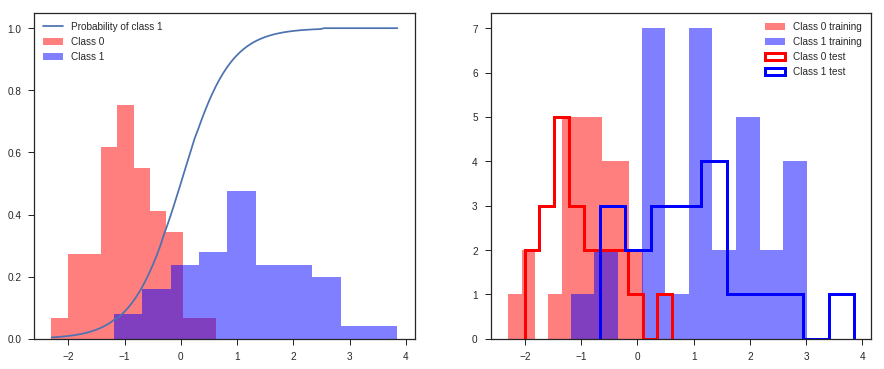

In [267]:
import matplotlib
import matplotlib.pyplot as plt

# data sets
from sklearn.datasets import make_classification

# for splitting data into training and testing
from sklearn.model_selection import train_test_split

# Support vector machine, C-support vector classifier
from sklearn.svm import SVC

# metrics 
from sklearn import metrics

# generate data and classes
X, y = make_classification(n_samples = 100, n_classes = 2, n_features=1, n_redundant=0, n_informative=1,
                           random_state=40, n_clusters_per_class=1)

# histograms of the two classes
fig, ax = plt.subplots(ncols = 2, figsize = (15, 6))
ax[0].hist(X[y == 0], color = 'r', alpha = 0.5, label = "Class 0", normed = True);
ax[0].hist(X[y == 1], color = 'b', alpha = 0.5, label = "Class 1", normed = True);

# split the data and plot
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=30)
ax[1].hist(X_train[y_train == 0], color = 'r', alpha = 0.5, label = "Class 0 training");
ax[1].hist(X_train[y_train == 1], color = 'b', alpha = 0.5, label = "Class 1 training");
ax[1].hist(X_test[y_test == 0], color = 'r', histtype = 'step', lw = 3, label = "Class 0 test");
ax[1].hist(X_test[y_test == 1], color = 'b', histtype = 'step', lw = 3, label = "Class 1 test");

# train a c-support vector classifier and plot the probability
clf = SVC(kernel="linear", C=0.025, probability = True)
clf.fit(X_train, y_train)
y_test_pred = clf.predict_proba(X_test)[:, 1]
xs = np.linspace(min(X), max(X), 100)
xs = xs[:, np.newaxis]
probs = clf.predict_proba(xs)[:, 1]
ax[0].plot(xs, probs, label = "Probability of class 1")
ax[0].legend()
ax[1].legend()

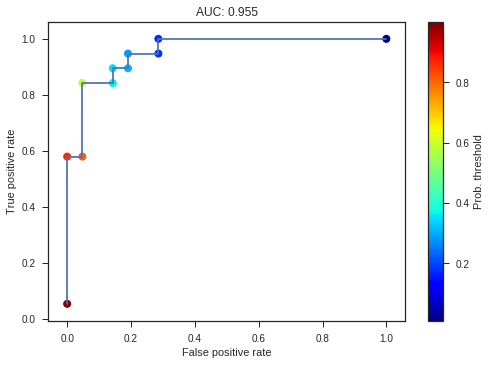

In [268]:
# get the ROC curve
fpr, tpr, thresh = metrics.roc_curve(y_test, y_test_pred, pos_label=1)
fig, ax = plt.subplots()
ax.set_title("AUC: %.3f" % metrics.roc_auc_score(y_test, y_test_pred))
ax.plot(fpr, tpr)
sc = ax.scatter(fpr, tpr, lw = 1, c = thresh, cmap = matplotlib.cm.jet)
cb = plt.colorbar(sc)
cb.set_label('Prob. threshold')
ax.set_xlabel("False positive rate")
ax.set_ylabel("True positive rate")

![](images/Precisionrecall.svg.png)

/home/fforster/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


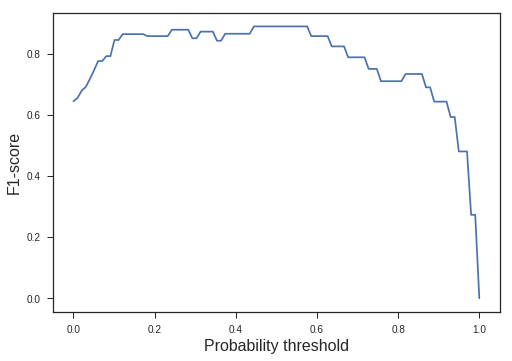

In [269]:
# get F1 score for different probability thresholds
fig, ax = plt.subplots()
xs = np.linspace(0, 1, 100)
f1scores = list(map(lambda prob: metrics.f1_score(y_test, y_test_pred >= prob), xs))
ax.plot(xs, f1scores)
ax.set_xlabel('Probability threshold', fontsize = 16)
ax.set_ylabel('F1-score', fontsize = 16)

Function for plotting the confusion matrix

http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

In [270]:
# Function to pretty print the confusion matrix

import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
Normalized confusion matrix


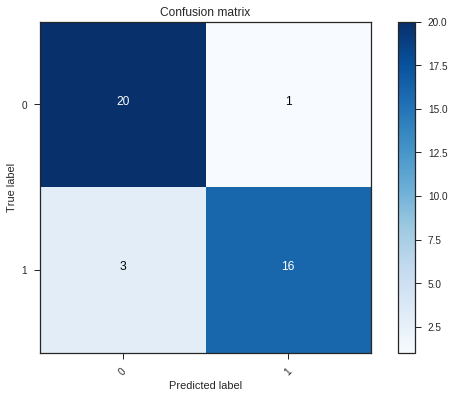

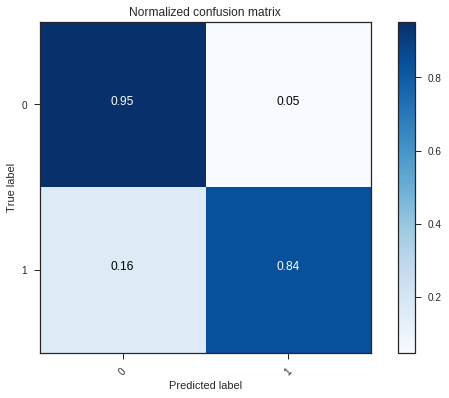

In [271]:
plt.subplots()
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred >= 0.5), range(2))
plt.subplots()
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred >= 0.5), range(2), normalize=True, title='Normalized confusion matrix')

# Classification model examples from sklearn

http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

Comparison between different classifiers on three different simulated datasets: "Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process", "Decision Tree", "Random Forest", "Neural Net", "AdaBoost", "Naive Bayes" and "QDA".

![](images/sklearn_classification.png)

/home/fforster/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/home/fforster/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/fforster/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/home/fforster/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


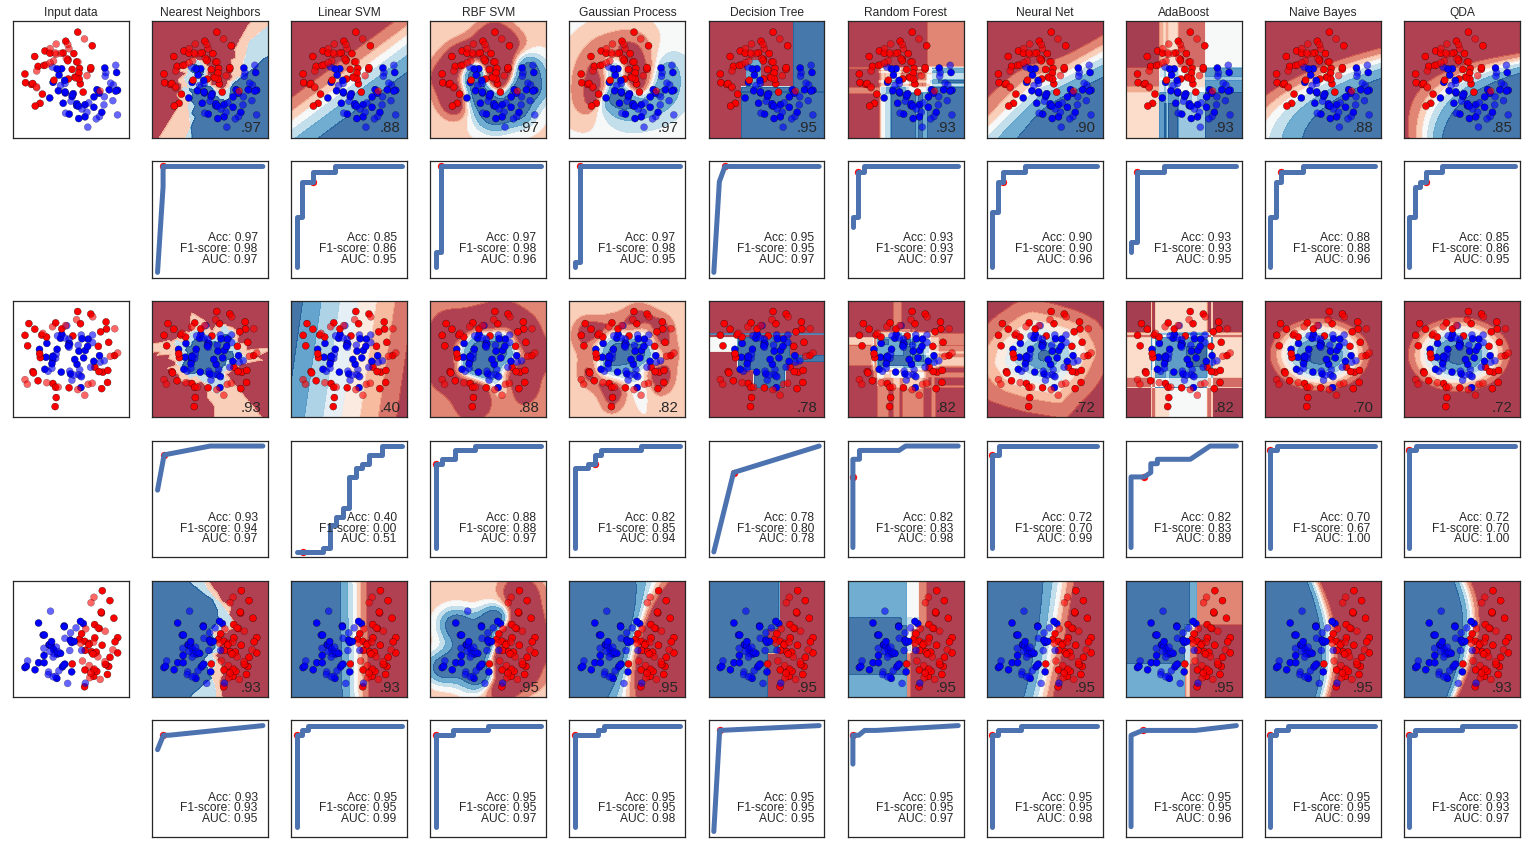

In [272]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# for splitting data into training and testing
from sklearn.model_selection import train_test_split

# standardize features removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

# data sets
from sklearn.datasets import make_moons, make_circles, make_classification

# multilayer perceptron classifier
from sklearn.neural_network import MLPClassifier

# K nearest neighbors classifier
from sklearn.neighbors import KNeighborsClassifier

# Support vector machine, C-support vector classifier
from sklearn.svm import SVC

# Gaussian process classifier
from sklearn.gaussian_process import GaussianProcessClassifier

# radial basis function kernel (squared exponential kernel)
from sklearn.gaussian_process.kernels import RBF

# Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Ensemble classifiers: Random forest and AdaBoost
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

# Quadratic Discriminant Analysis classifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis



h = .02  # step size in the mesh

# different classifiers
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, probability = True),
    SVC(gamma=2, C=1, probability = True),
    GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]


# linearly separable datatest
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

# all different datasets
datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 15))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    
    # test_size is 40% of the data
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)
                
    # create grid to evaluate classifiers
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(2 * len(datasets), len(classifiers) + 1, i + ds_cnt * (len(classifiers) + 1))
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(2 * len(datasets), len(classifiers) + 1, i + ds_cnt * (len(classifiers) + 1))
        
        # fit the model using the training set
        clf.fit(X_train, y_train)
        
        # compute the mean accuracy of the classifier
        score = clf.score(X_test, y_test)

        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')

        # plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        # set limits
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        
        # remove ticks
        ax.set_xticks(())
        ax.set_yticks(())
        
        # write title only for the first data set for each classifier
        if ds_cnt == 0:
            ax.set_title(name)
            
        # plot the accuracy score
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        
        # compute ROC curve
        y_test_pred = clf.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred, pos_label=1)
        auc = metrics.roc_auc_score(y_test, y_test_pred)
        acc = metrics.accuracy_score(y_test, y_test_pred >= 0.5)
        f1 = metrics.f1_score(y_test, y_test_pred >= 0.5)
        ax = plt.subplot(2 * len(datasets), len(classifiers) + 1, i + (ds_cnt + 1) * (len(classifiers) + 1))
        ax.set_xlim(-.05, 1.05)
        ax.set_ylim(-.05, 1.05)
        ax.set_xticks(())
        ax.set_yticks(())
        ax.text(0.95, 0.3, "Acc: %.2f" % acc, ha = 'right')
        ax.text(0.95, 0.2, "F1-score: %.2f" % f1, ha = 'right')
        ax.text(0.95, 0.1, "AUC: %.2f" % auc, ha = 'right')
        ax.plot(fpr, tpr, lw = 5)
        idx = np.argmin(np.abs(thresholds - 0.5))
        ax.scatter(fpr[idx], tpr[idx], marker = 'o', c = 'r')

        # counter 
        i += 1

# Multiclass classification

Some classifiers are inherently multiclass:

* Naive Bayes

* Logistic Regression

* K Nearest Neighbours

Other classifiers are binary:

* support vector machine

* perceptron

* boosting

These classifiers requiere modifications to become multiclass

# Binary to multiclass

In order to make a binary classifier multiclass we can do different things:

Let us assume there are k classes


* **One vs the rest**: build k classifiers which classify one class vs all the others. 

   * It will fail if any classifier fails!
   
   ![](images/onevsall.png)
 
 
* **One vs one**: build k (k - 1) / 2 classifiers using all possible pairs of classes. Make the classifiers vote to decide the class.

   * Training each class only uses elements from pairs of classes -> training can be faster
   
   * Evaluation can be slower since we need to run more models
   
   * This is used by **sklearn for SVM classifiers SVC and NuSVC**
   
   ![](images/allpairs.png)
   
* **Error correcting output codes**: use sequences of ones or zeros to represent each class (codewords). Train as many classifiers as the number of bits in the codewords. Apply the classifier and select the class with the closest codeword.

    * Selecting codewords with more bits than classes allows for some redundancy, hence the "Error Correcting" name
    
    * Example of ten classes and codewords of 15 bits.  In this case 15 binary classifiers are trained.
    
    ![](images/ECOC.png)

# Multiclass classifier 

# NIST dataset

http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py

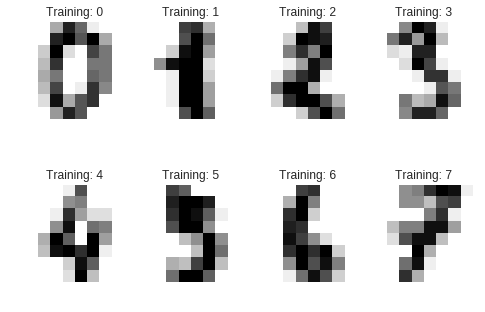

In [274]:
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits
# images are in digits.images and their associated numbers in digits.target
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:8]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [275]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first half
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899




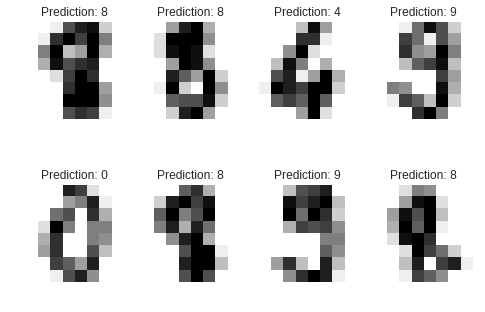

In [276]:
# now we confirm our predicted images

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:8]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

Normalized confusion matrix


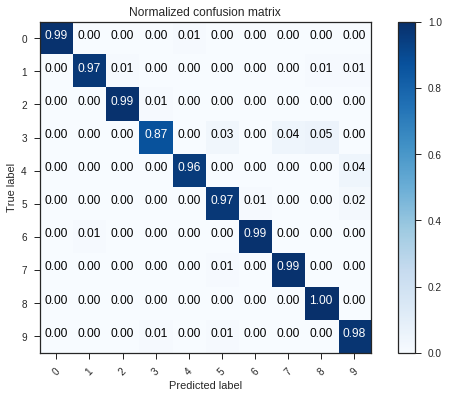

In [277]:
# Confusion matrix
plt.figure()
plot_confusion_matrix(metrics.confusion_matrix(expected, predicted), classes=range(10), normalize=True,
                      title='Normalized confusion matrix')

# Multiclass classification iris dataset

http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html

In [562]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

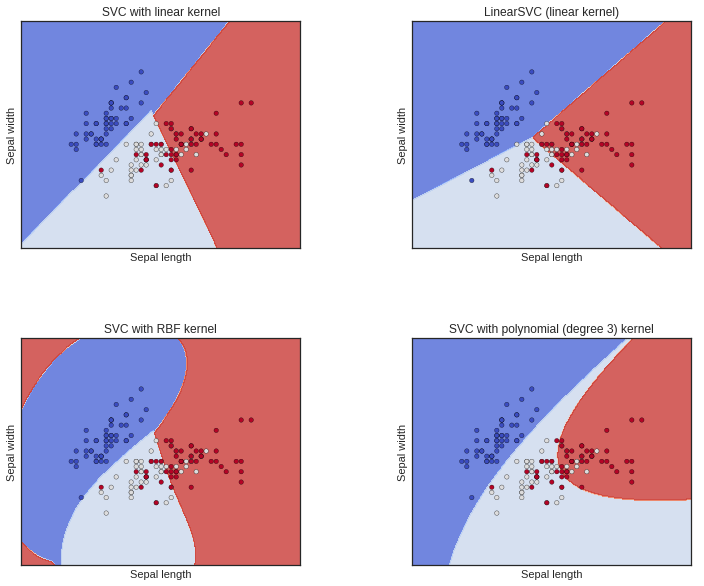

In [563]:
# import the dataset
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# plot titles
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2, figsize = (12, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

# Training, validation and test sets

It is clear that the separattion between training and test sets is needed in order to avoid overfitting.

However, when optimizing the **hyperparameters** of a classification model one must use some test set as diagnostic. 

This means that the hyperparameters can be **overfitted to the test set**.

In order to avoid this problem an intermediate test set is created: the **validation** set.

Thus, in general one will need **training**, **validation** and **test** sets to solve the classification problem, which has the disadvantage of reducing the set sizes even further.

# Cross-validation

A solution to the previous problem is called **cross--validation (CV)**, which is a family of set splitting strategies.

* The simplest is called **k-fold CV**: 
    
    A test set is held out for final evaluation. The training set is split into k smaller sets.
    
    A model is trained using k-1 of the folds as training data.
    
    The resulting model is evaluated on the remaining part of the data.
    
    The performance measure reported by k-fold CV is the average of the previous values.

# Variations on k-fold

* **Repeated k-fold**:

    Repeat k-fold CV n times, producing different folds each time
    

* **Leave One Out (LOO)**:

    Each learning is created by taking all samples except one
    
    For n samples, we have n different training sets
    
    As a general rule, 5 or 10-fold CV is preferred
    

* **Leave P out (LPO)**:

    Similar to LOO, but removing p samples
    

* Random permutations and split (**shuffle & split**):

    A user defined number of independents train / validation dataset splits. Each time samples are shuffled and then split.


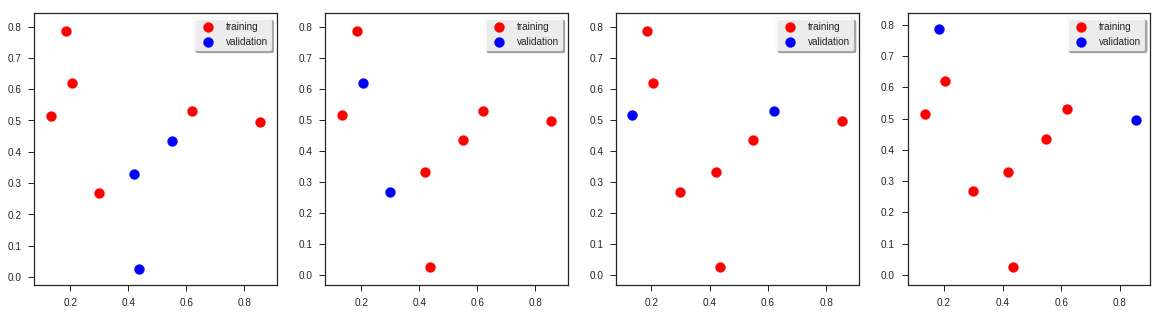

In [429]:
np.random.seed(2)
X = np.random.random((9, 2))

from sklearn.model_selection import KFold, LeaveOneOut, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit

n_splits = 4

# Kfold
fig, ax = plt.subplots(ncols = n_splits, figsize = (n_splits * 5, 5))
kf = KFold(n_splits=n_splits)
for idx, traintest in enumerate(kf.split(X)):
    train, test = traintest
    ax[idx].scatter(X[train][:, 0], X[train][:, 1], c = 'r', s = 100, label = 'training')
    ax[idx].scatter(X[test][:, 0], X[test][:, 1], c = 'b', s = 100, label = 'validation')
    ax[idx].legend(frameon=True, shadow=True);

# note that any point is blue once and only once

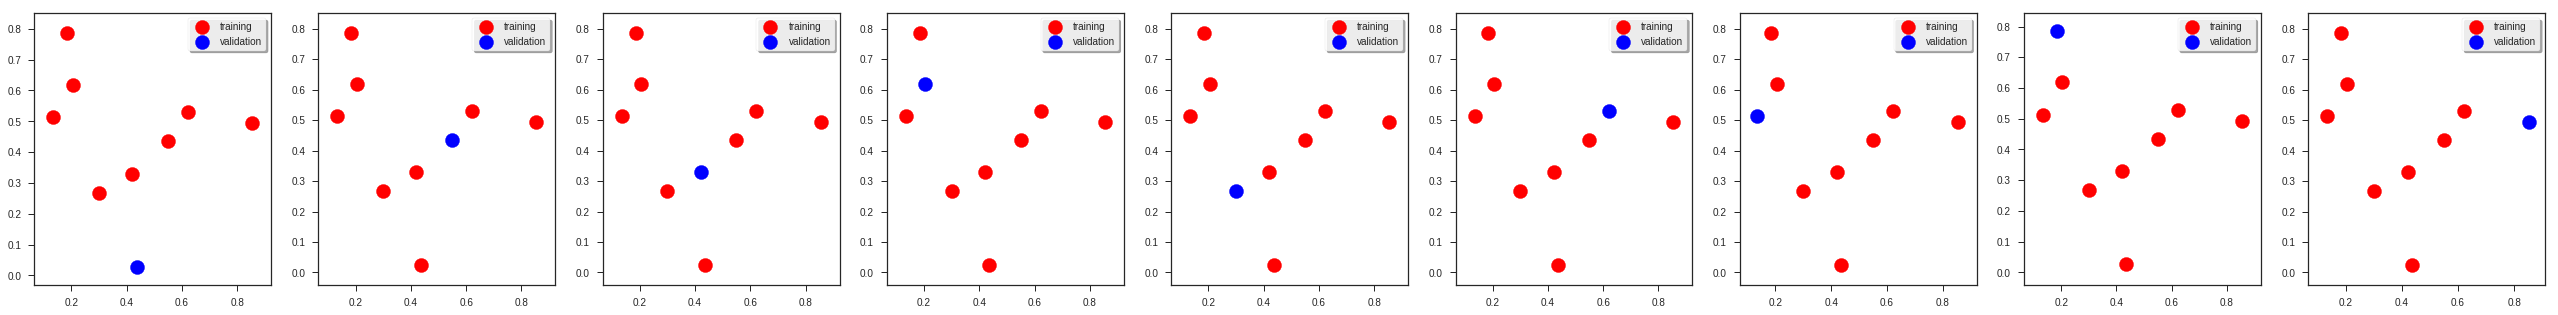

In [430]:
# Leave one out

fig, ax = plt.subplots(ncols = len(X), figsize = (len(X) * 5, 5))
kf = LeaveOneOut()
for idx, traintest in enumerate(kf.split(X)):
    train, test = traintest
    ax[idx].scatter(X[train][:, 0], X[train][:, 1], c = 'r', s = 200, label = 'training')
    ax[idx].scatter(X[test][:, 0], X[test][:, 1], c = 'b', s = 200, label = 'validation')
    ax[idx].legend(frameon=True, shadow=True);


# note that only one point is left out each time

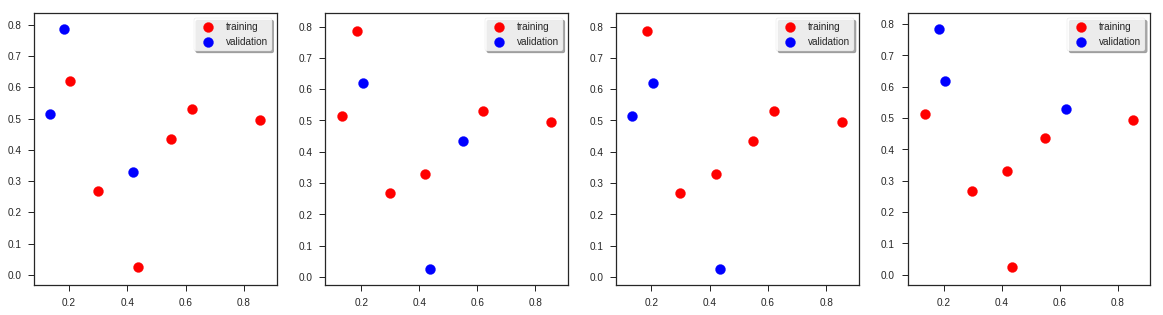

In [431]:
# Shuffle & Split

fig, ax = plt.subplots(ncols = n_splits, figsize = (n_splits * 5, 5))
kf = ShuffleSplit(n_splits = n_splits, test_size = 0.25)
for idx, traintest in enumerate(kf.split(X)):
    train, test = traintest
    ax[idx].scatter(X[train][:, 0], X[train][:, 1], c = 'r', s = 100, label = 'training')
    ax[idx].scatter(X[test][:, 0], X[test][:, 1], c = 'b', s = 100, label = 'validation')
    ax[idx].legend(frameon=True, shadow=True);


# note that some points can be blue more than once and some are red always

# Variations on k-fold taking that try to balance class labels

* **stratified k-fold CV**:

    Each set contains approximately the same percentage of samples of each target class as the complete set

In [439]:
np.random.seed(2)
X = np.random.random((20, 2))
y = np.random.random(20) > 0.3 # 70% circles + 30% stars

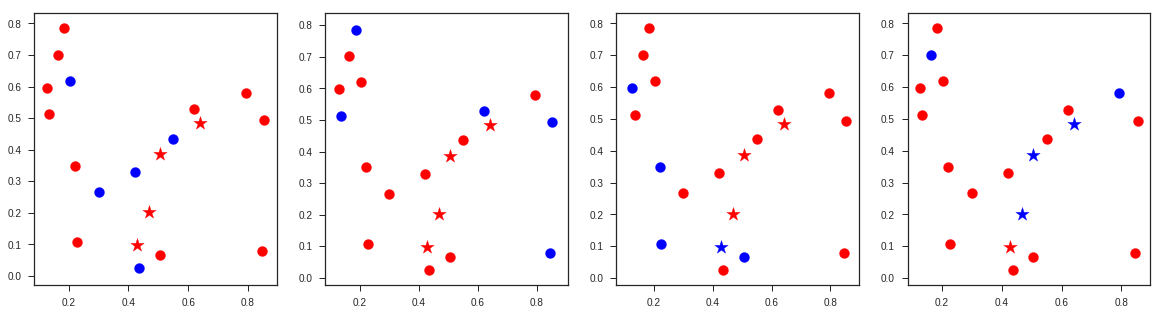

In [434]:
n_splits = 4
fig, ax = plt.subplots(ncols = n_splits, figsize = (n_splits * 5, 5))
kf = KFold(n_splits = n_splits)
for idx, traintest in enumerate(kf.split(X)):
    train, test = traintest
    ax[idx].scatter(X[train][~y[train]][:, 0], X[train][~y[train]][:, 1], marker = '*', s = 200, c = 'r', label = 'training class 0')
    ax[idx].scatter(X[test][~y[test]][:, 0], X[test][~y[test]][:, 1], marker = '*', s = 200, c = 'b', label = 'validation class 0')
    ax[idx].scatter(X[train][y[train]][:, 0], X[train][y[train]][:, 1], c = 'r', s = 100, label = 'training class 1')
    ax[idx].scatter(X[test][y[test]][:, 0], X[test][y[test]][:, 1], c = 'b', s = 100, label = 'validation class 1')
    
    
# note that in 1st and 2nd splits the validation set does not contain any stars

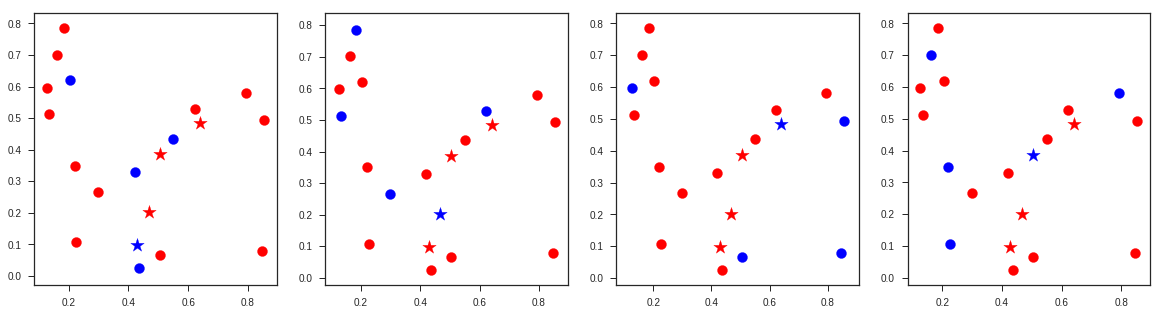

In [438]:
n_splits = 4
fig, ax = plt.subplots(ncols = n_splits, figsize = (n_splits * 5, 5))
kf = StratifiedKFold(n_splits = n_splits)
for idx, traintest in enumerate(kf.split(X, y)):
    train, test = traintest
    ax[idx].scatter(X[train][~y[train]][:, 0], X[train][~y[train]][:, 1], marker = '*', s = 200, c = 'r', label = 'training class 0')
    ax[idx].scatter(X[test][~y[test]][:, 0], X[test][~y[test]][:, 1], marker = '*', s = 200, c = 'b', label = 'validation class 0')
    ax[idx].scatter(X[train][y[train]][:, 0], X[train][y[train]][:, 1], c = 'r', s = 100, label = 'training class 1')
    ax[idx].scatter(X[test][y[test]][:, 0], X[test][y[test]][:, 1], c = 'b', s = 100, label = 'validation class 1')
    
# note that the validation set contains at least one star in each fold

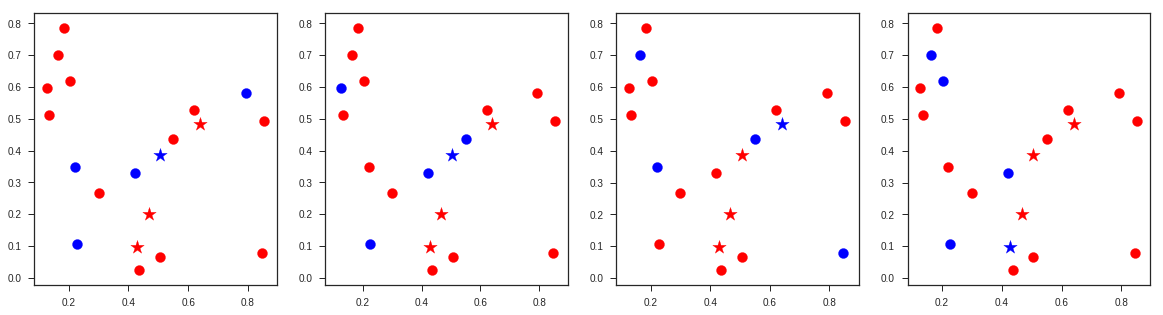

In [437]:
n_splits = 4
fig, ax = plt.subplots(ncols = n_splits, figsize = (n_splits * 5, 5))
kf = StratifiedShuffleSplit(n_splits = n_splits, test_size = 0.25)
for idx, traintest in enumerate(kf.split(X, y)):
    train, test = traintest
    ax[idx].scatter(X[train][~y[train]][:, 0], X[train][~y[train]][:, 1], marker = '*', s = 200, c = 'r', label = 'training class 0')
    ax[idx].scatter(X[test][~y[test]][:, 0], X[test][~y[test]][:, 1], marker = '*', s = 200, c = 'b', label = 'validation class 0')
    ax[idx].scatter(X[train][y[train]][:, 0], X[train][y[train]][:, 1], c = 'r', s = 100, label = 'training class 1')
    ax[idx].scatter(X[test][y[test]][:, 0], X[test][y[test]][:, 1], c = 'b', s = 100, label = 'validation class 1')
    
# note that the validation now contains at least one star each time, and they can be repeated

# Unbalanced classification

Here we illustrate the problem of training with unbalanced classes

http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane_unbalanced.html

/home/fforster/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


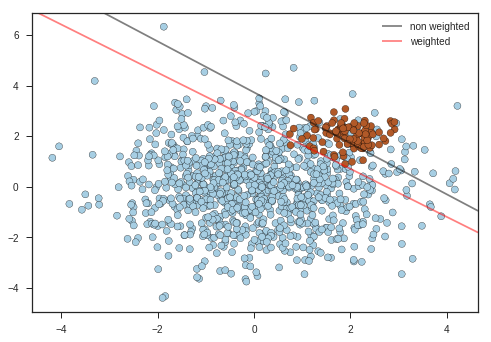

In [547]:
# let's create 40 separable points
rng = np.random.RandomState(4)
# size of classes with 10:1 ratio
n_samples_1 = 1000
n_samples_2 = 100
# X values 
X = np.r_[1.5 * rng.randn(n_samples_1, 2),
          0.5 * rng.randn(n_samples_2, 2) + [2, 2]]
# classes
y = [0] * (n_samples_1) + [1] * (n_samples_2)

# fit the model and get the separating hyperplane
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X, y)

# fit the model and get the separating hyperplane weighting the classes by the inverse of their sizes
wclf = svm.SVC(kernel='linear', class_weight={1: 10})
wclf.fit(X, y)

# plot separating hyperplanes and samples
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.legend()

# plot the decision functions for both classifiers
# ---------

# start plot
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# get the separating hyperplane
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
a = ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])

# get the separating hyperplane for weighted classes
Z = wclf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins for weighted classes
b = ax.contour(XX, YY, Z, colors='r', levels=[0], alpha=0.5, linestyles=['-'])

plt.legend([a.collections[0], b.collections[0]], ["non weighted", "weighted"],
           loc="upper right")

Note that whether to use weighted training depends on what is our aim.

# Finding an hyperparameter

We will use the previous example of an unbalanced set.

 * We will first do a Stratified test-training split.
 * Then we will use StratifiedKFold to build validation sets
 * We will choose the best hyperparameter C for the previous classifier based on the average AUCs.



In [548]:
# extract the test and training sets

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.1)
fig, ax = plt.subplots()
ax.scatter(X_train[:, 0], X_train[:, 1], marker = 'o', edgecolors = 'k', c = y_train, cmap = matplotlib.cm.Paired, alpha = 0.8, label = 'Train')
ax.scatter(X_test[:, 0], X_test[:, 1], marker = '*', edgecolors = 'k', s = 200, c = y_test, cmap = matplotlib.cm.Paired, alpha = 0.8, label= 'Test')
plt.legend()

Final AUC in test set: 0.9670


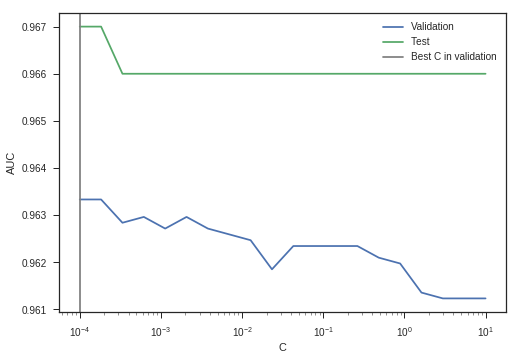

In [559]:
X_train = np.array(X_train)
y_train = np.array(y_train)

fig, ax = plt.subplots()

Cs = np.logspace(-4, 1, 20)
AUCs = np.zeros_like(Cs)

# vary the error penaly parameter C between 0.1 and 10 in a logarithmic grid
for idx, C in enumerate(Cs):
    print(C, end = '\r')

    # weighted classifier
    wclf = svm.SVC(C = C, kernel='linear', probability = True, class_weight={1: 10})
    
    # do 10-fold stratified splits
    n_splits = 10
    kf = StratifiedKFold(n_splits = n_splits)

    # train with the resulting training sets
    for train, validation in kf.split(X_train, y_train):
    
        wclf.fit(X_train[train], y_train[train])
        y_validation_pred = wclf.predict_proba(X_train[validation])[:, 1]
        AUCs[idx] += metrics.roc_auc_score(y_train[validation], y_validation_pred)
        
    AUCs[idx] /= n_splits
    
ax.plot(Cs, AUCs, label = 'Validation')
ax.set_xscale('log')
ax.set_xlabel("C")
ax.set_ylabel("AUC")

# choose best C value
idxbest = np.argmax(AUCs)
wclf = svm.SVC(C = Cs[idxbest], kernel='linear', probability = True, class_weight={1: 10})
wclf.fit(X_train, y_train)
y_test_pred = wclf.predict_proba(X_test)[:, 1]
finalAUC = metrics.roc_auc_score(y_test, y_test_pred)

print("Final AUC in test set: %.4f" % finalAUC)

# check what was the AUCs for different Cs in the test set
AUCs_test = np.zeros_like(AUCs)
for idx, C in enumerate(Cs):
    wclf = svm.SVC(C = C, kernel='linear', probability = True, class_weight={1: 10})
    wclf.fit(X_train, y_train)
    y_test_pred = wclf.predict_proba(X_test)[:, 1]
    AUCs_test[idx] = metrics.roc_auc_score(y_test, y_test_pred)

ax.plot(Cs, AUCs_test, label = 'Test')
ax.axvline(Cs[idxbest], c = 'gray', label = 'Best C in validation')
ax.legend()


# Summary:

* ### Different diagnostics to measure the quality of a classifier beyond its accuracy.

* ### Recall and precision and variations the key diagnostics, F1 and F$_\beta$ harmonic mean averages (incl. weights).

* ### Macro and micro averages can be used for all diagnostics

* ### ROC and DET curves allows visualizing trade--off between false positives and false negatives

* ### Area under the curve measures overall quality.

* ### Training, validation and test sets important to allow model selection without overfitting (knowledge leaking)

* ### Different techniques to avoid very small validation and test sets: variations on K-fold cross-validation (stratified important for unbalanced sets)

* ### Training with unbalanced sets may require weighting the sample

* ### Remember that you can train with the full dataset after all the previous tests in order to build a classifier which will be used in some other data

# SDSS dataset

point sources:
http://astrostatistics.psu.edu/MSMA/datasets/

In [180]:
import pandas as pd
dfSDSS = pd.read_csv("data/SDSS/SDSS_test.csv")
dfSDSS.head()

u_mag      g_mag      r_mag      i_mag      z_mag          ra  \
0  19.388308  17.056925  16.096813  15.746082  15.560712  180.014854   
1  17.983265  17.071049  16.763483  16.655209  16.600836  180.013069   
2  19.171825  18.006130  17.593836  17.435181  17.363775  180.008443   
3  20.736958  18.583487  17.643984  17.305689  17.137621  180.006998   
4  20.706478  19.746189  19.348160  19.217245  19.166542  180.001280   

         dec  
0  20.902615  
1  24.473978  
2  23.831747  
3  20.848208  
4  20.797977

In [181]:
dfSDSS.describe()

u_mag         g_mag         r_mag         i_mag         z_mag  \
count  12884.000000  12884.000000  12884.000000  12884.000000  12884.000000   
mean      19.547640     18.216281     17.691036     17.483180     17.388229   
std        1.079137      1.164691      1.283075      1.344486      1.384349   
min       16.267324     15.136630     15.120845     15.010015     15.000120   
25%       18.816042     17.354426     16.649030     16.326765     16.194059   
50%       19.793846     18.273118     17.664647     17.459014     17.358801   
75%       20.444933     19.154900     18.777277     18.638360     18.579539   
max       20.999977     20.917217     20.840933     20.564775     20.332567   

                 ra           dec  
count  12884.000000  12884.000000  
mean     182.500184     22.452076  
std        1.449920      1.443824  
min      180.000177     20.000057  
25%      181.240715     21.200020  
50%      182.516214     22.420964  
75%      183.757717     23.692790  
max      184.999628     24.999541

![title](images/sdss_filters.png)

![title](images/stellar_spectra.gif)

![title](images/qso_spectrum.gif)

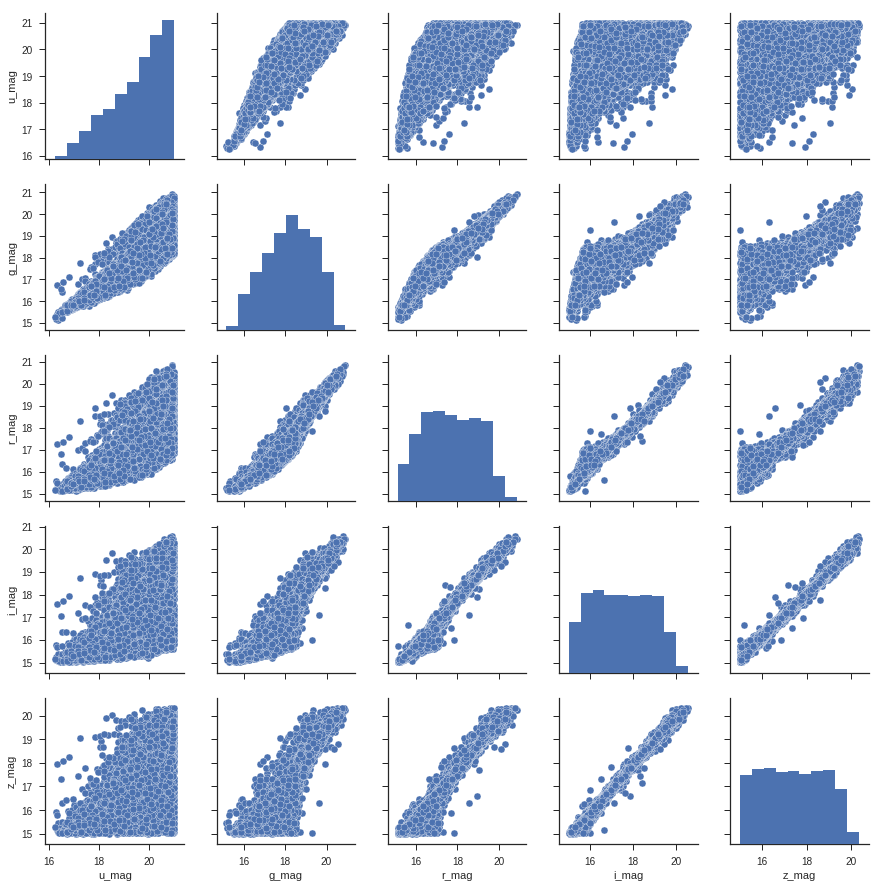

In [92]:
sns.pairplot(dfSDSS.drop('ra', axis = 1).drop('dec', axis = 1))

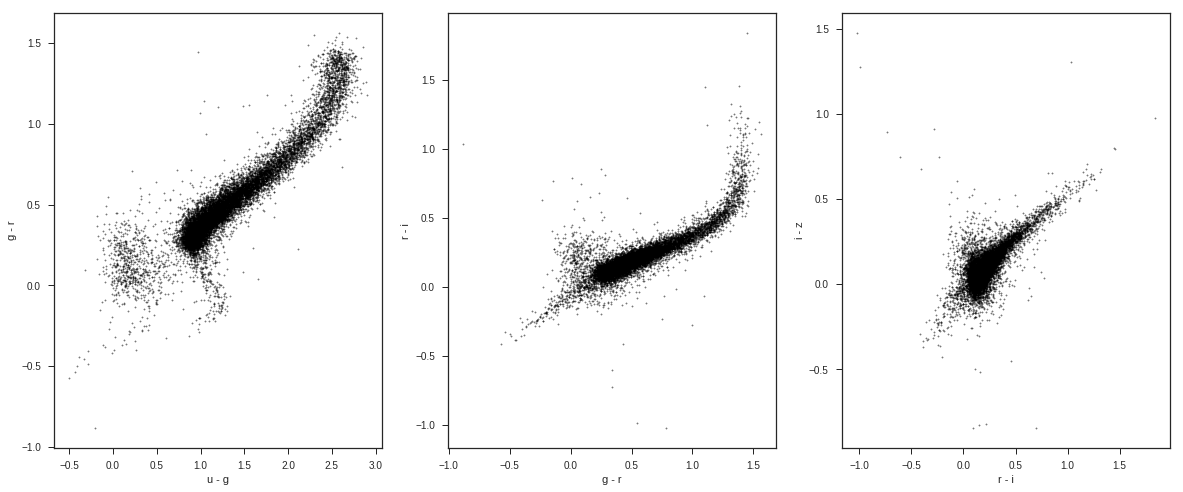

In [161]:
import matplotlib.pyplot as plt

diffs = ['u - g', 'g - r', 'r - i', 'i - z']
fig, ax = plt.subplots(ncols = len(diffs) - 1, figsize = (20, 8))
def plotcols(ax, df, diffs, color):
    for idx, diff in enumerate(zip(diffs[:-1], diffs[1:])):
        ax[idx].scatter(df["%s_mag" % diff[0][0]] - df["%s_mag" % diff[0][-1]], df["%s_mag" % diff[1][0]] - df["%s_mag" % diff[1][-1]], s = 2, alpha = 0.5, color = color)
        ax[idx].set_xlabel(diff[0])
        ax[idx].set_ylabel(diff[1])
        
plotcols(ax, dfSDSS, diffs, color = '')

In [162]:
dfWD = pd.read_csv("data/SDSS/SDSS_wd.csv", sep='\s*,\s*', engine='python')
dfWD

Sp_Class   u_mag   g_mag   r_mag   i_mag   z_mag          RA        Dec
0       DA_auto  19.186  18.835  18.884  19.052  19.407    0.028147  -0.781616
1            DA  19.421  19.565  20.000  20.277  21.152    0.029836  -9.727753
2            DQ  19.413  19.091  19.052  19.120  19.339    0.048182  -8.835651
3       DA_auto  20.423  20.041  19.925  20.030  20.012    0.051346  -0.845157
4            DA  19.285  18.891  18.810  18.886  18.958    0.093902 -10.861710
5            DA  18.213  18.196  18.524  18.880  19.116    0.095323  -0.109921
6       DA_auto  18.284  17.849  18.042  18.240  18.479    0.141971  -1.138883
7            DQ  19.146  18.728  18.686  18.667  18.812    0.218520  -0.436291
8            DC  19.257  18.997  18.954  19.031  19.108    0.226600  -9.135448
9       DA_auto  19.282  18.844  19.069  19.296  19.502    0.266915   0.065503
10           DC  19.096  18.521  18.317  18.275  18.301    0.347011 -11.198875
11      DA_auto  19.048  18.847  19.154  19.476  19.746    0.364507   0.633086
12           DB  19.944  20.124  20.405  20.579  20.957    0.523203   0.344921
13          DAZ  20.094  19.793  20.039  20.257  20.459    0.691639  -1.142187
14      DA_auto  18.969  18.579  18.556  18.648  18.654    0.719906  13.892236
15           DA  19.346  18.855  18.829  18.916  19.000    0.784700  -9.696408
16           DA  18.940  18.485  18.536  18.616  18.805    0.990141  -0.827536
17           DA  18.940  18.485  18.536  18.616  18.805    0.990141  -0.827536
18      DA_auto  19.308  18.967  19.190  19.448  19.642    1.120784   0.967213
19      DA_auto  18.948  18.542  18.534  18.587  18.677    1.173974  15.478089
20           DA  20.294  20.256  20.441  20.873  21.091    1.341735  -9.541884
21           DA  19.410  18.938  18.923  19.008  19.191    1.443362  -9.665224
22     DQhot_H:  17.310  17.685  18.100  18.460  18.757    1.482943 -10.037089
23           DZ  19.061  18.737  18.717  18.815  18.906    1.488527   0.309239
24           DA  18.350  18.654  19.146  19.521  19.635    1.594222   1.166313
25           DA  18.722  18.667  18.941  19.204  19.338    1.627345   0.389989
26      DA_auto  19.457  18.998  19.051  19.084  19.138    1.652583  16.043816
27           DA  19.891  19.606  19.918  20.101  20.050    1.685668 -11.221349
28      DA_auto  19.531  19.377  19.622  19.864  20.090    1.781765   1.241754
29           DA  19.057  18.904  19.190  19.471  19.647    1.820187 -10.319006
...         ...     ...     ...     ...     ...     ...         ...        ...
10060     DQhot  18.715  18.989  19.450  19.781  19.763  357.180453  -9.712600
10061      DA+M  22.886  22.775  20.808  19.474  18.788  357.187161   0.495110
10062       DB:  19.942  19.998  20.198  20.386  20.441  357.275484   1.006147
10063   DA_auto  20.040  19.743  20.032  20.181  20.474  357.451743  -0.803378
10064      DA+M  19.697  18.698  17.750  16.837  16.384  357.614989   0.732973
10065        DA  18.516  18.096  18.212  18.328  18.481  357.669754  -0.908580
10066        DA  18.516  18.096  18.212  18.328  18.481  357.669754  -0.908580
10067   DA_auto  19.228  18.798  18.852  18.954  19.064  357.755861  15.464256
10068      DAOB  17.285  17.680  18.134  18.453  18.741  357.905159   1.145615
10069        DA  20.747  20.095  20.111  20.236  20.387  358.057510   0.829932
10070        DA  18.248  17.777  17.822  17.899  18.118  358.064360  -0.689123
10071        DA  18.248  17.777  17.822  17.899  18.118  358.064360  -0.689123
10072   DA_auto  20.113  19.682  19.861  20.020  20.440  358.079193  -0.774357
10073       DA:  20.312  20.535  20.853  21.312  21.699  358.127692  -0.641027
10074        DA  20.316  20.078  20.383  20.698  21.115  358.223639  -0.310377
10075   DA_auto  17.829  17.564  17.830  18.088  18.395  358.311660  -0.305701
10076   DA_auto  20.496  19.970  19.803  19.775  19.915  358.340026   0.185415
10077        DB  19.594  19.708  20.095  20.364  20.444  358.342338   0.448294
10078     DB_A:  18.128  18.182  18.390  18.596  18.759  

In [160]:
plotcols(ax, dfWD, diffs, 'b')


In [151]:
dfQSO = pd.read_table("data/SDSS/SDSS_QSO.dat", sep = '\s+')
dfQSO

SDSS       z   u_mag  sig_u_mag   g_mag  sig_g_mag  \
0      000006.53+003055.2  1.8227  20.389      0.066  20.468      0.034   
1      000008.13+001634.6  1.8365  20.233      0.054  20.200      0.024   
2      000009.26+151754.5  1.1986  19.921      0.042  19.811      0.036   
3      000009.38+135618.4  2.2400  19.218      0.026  18.893      0.022   
4      000009.42-102751.9  1.8442  19.249      0.036  19.029      0.027   
5      000011.41+145545.6  0.4596  19.637      0.030  19.466      0.024   
6      000011.96+000225.3  0.4790  18.237      0.028  17.971      0.020   
7      000012.25-003220.5  1.4365  20.424      0.068  20.502      0.033   
8      000013.14+141034.6  0.9491  19.519      0.034  19.281      0.028   
9      000013.80-005446.8  1.8361  20.541      0.063  20.212      0.034   
10     000014.82-011030.6  1.8902  19.484      0.038  19.366      0.031   
11     000015.47+005246.8  1.8476  19.777      0.046  19.615      0.023   
12     000016.43-001833.4  0.7026  18.782      0.032  18.129      0.024   
13     000017.38-085123.7  1.2499  19.151      0.034  18.722      0.020   
14     000017.88+002612.6  0.5459  20.183      0.059  19.911      0.028   
15     000024.02+152005.4  0.9885  19.413      0.044  19.183      0.035   
16     000026.29+134604.6  0.7678  19.345      0.030  18.998      0.023   
17     000028.82-102755.7  1.1377  20.461      0.086  19.697      0.030   
18     000030.37-002732.4  1.8030  20.415      0.070  20.251      0.030   
19     000031.86+010305.2  1.0925  20.566      0.070  20.100      0.023   
20     000032.70-005512.9  1.5247  19.941      0.045  19.802      0.031   
21     000035.75-103305.3  1.2177  19.404      0.041  19.455      0.029   
22     000038.65+011426.3  1.8352  20.760      0.085  20.394      0.025   
23     000038.99-001803.9  2.1224  19.204      0.044  19.076      0.022   
24     000041.58+010545.5  1.5452  20.596      0.074  20.401      0.035   
25     000042.02-004501.3  1.3077  20.167      0.067  20.387      0.043   
26     000042.89+005539.5  0.9512  18.353      0.037  18.150      0.015   
27     000043.70-001346.2  2.1938  21.654      0.176  20.918      0.037   
28     000043.95-091134.9  0.4388  19.055      0.038  18.724      0.033   
29     000046.15-003007.1  1.4354  19.881      0.055  19.666      0.022   
...                   ...     ...     ...        ...     ...        ...   
77399  235917.44+011200.7  1.9020  20.457      0.080  20.279      0.026   
77400  235918.04+144853.5  1.2965  19.122      0.027  18.930      0.017   
77401  235919.12+001027.0  2.8937  21.407      0.159  19.794      0.024   
77402  235919.15-003121.0  0.8365  21.664      0.202  21.054      0.043   
77403  235920.76-001644.5  0.8698  21.118      0.120  20.552      0.034   
77404  235920.92+005855.1  0.5412  21.929      0.209  21.237      0.049   
77405  235924.73+152541.6  1.5743  20.129      0.043  19.734      0.020   
77406  235925.46+002854.6  2.0343  18.499      0.025  18.338      0.039   
77407  235926.25-004750.3  0.3961  20.015      0.052  19.549      0.021   
77408  235927.16-000204.8  2.3657  20.607      0.070  19.785      0.029   
77409  235930.06+000839.5  0.5701  19.850      0.048  19.446      0.023   
77410  235930.36-004817.4  1.0026  21.135      0.139  20.983      0.041   
77411  235930.42+003733.5  0.8621  19.428      0.035  19.055      0.039   
77412  235936.81-003112.7  1.0951  20.544      0.074  20.460      0.032   
77413  235937.58+004223.2  1.4624  20.351      0.051  20.211      0.031   
77414  235938.40-003448.4  1.2039  18.510      0.022  18.341      0.021   
77415  235940.53-090942.9  0.5702  19.313      0.032  18.992      0.030   
77416  235942.35+001338.2  0.9787  19.764      0.039  19.530      0.020   
77417  235944.13-005738.2  1.7851  19.656      0.040  19.437      0.021   
77418  235945.49-005819.6  1.8119  18.921      0.031  18.851      0.019   
77419  235948.09+001229.5  2.0649  20.005      0.059  19.819      0.024   
77420  235948.53-103938.5  0.8288  18.070     

In [117]:
dfstars = pd.read_csv("data/SDSS/SDSS_stars.csv")
dfstars

u_mag      g_mag      r_mag      i_mag      z_mag          ra  \
0     20.533161  17.968031  16.827314  16.373095  16.091063  190.001261   
1     18.894476  17.674576  17.208895  17.033516  16.972940  190.002330   
2     18.290901  17.022612  16.625498  16.431305  16.399673  190.012240   
3     19.784182  17.820679  17.003235  16.721306  16.541569  190.012912   
4     18.874607  17.638632  17.120625  16.907972  16.849592  190.012951   
5     17.867540  16.639681  16.141216  15.965429  15.928070  190.022442   
6     18.879200  17.440918  16.783993  16.498568  16.322937  190.024952   
7     18.352959  16.790821  16.159140  15.892138  15.750802  190.022975   
8     19.135710  17.171570  16.468216  16.240795  16.100643  190.018998   
9     18.790855  17.476933  17.014111  16.790920  16.637476  190.024325   
10    19.145519  16.804733  15.933923  15.629789  15.496177  190.012941   
11    18.170340  17.356983  17.053757  16.946266  16.887997  190.057844   
12    19.677872  17.954597  17.324135  17.123587  17.010965  190.028920   
13    17.438683  16.251499  15.854064  15.743556  15.747505  190.027208   
14    17.936586  16.434299  15.833981  15.570570  15.441114  190.029391   
15    18.883848  17.980923  17.684792  17.611734  17.569311  190.065128   
16    17.041290  15.772053  15.495051  15.349021  15.351124  190.056751   
17    18.358896  17.211678  17.078781  17.004826  16.935291  190.067367   
18    17.902500  16.526434  15.972104  15.741626  15.595447  190.067600   
19    20.398233  17.731331  16.401684  15.739979  15.403962  190.055263   
20    17.929996  16.880173  16.482742  16.353615  16.206572  190.061697   
21    18.409500  16.875046  16.229204  15.947639  15.795818  190.064603   
22    17.654909  16.321001  15.791855  15.520825  15.477778  190.064741   
23    18.154593  17.284355  16.919685  16.780781  16.705008  190.066018   
24    17.389656  15.943317  15.415464  15.246211  15.178227  190.055129   
25    18.966152  17.842972  17.413029  17.218576  17.156904  190.107424   
26    18.818127  17.119886  16.451841  16.166504  16.075933  190.144606   
27    18.905525  17.745646  17.313175  17.101891  17.093149  190.145274   
28    16.173410  15.331834  15.108277  15.484584  15.054942  190.068359   
29    19.315111  17.153566  16.285093  15.950887  15.805859  190.146889   
...         ...        ...        ...        ...        ...         ...   
4970  18.070665  16.954456  17.058496  17.141319  17.232864  194.666351   
4971  18.053112  16.925007  16.379694  16.170782  16.068260  192.693572   
4972  18.543028  17.544609  17.207760  17.121807  17.089552  192.748959   
4973  18.316999  16.968691  16.483128  16.327868  16.269333  192.749735   
4974  19.169744  17.799129  17.248343  17.063467  17.048143  192.795874   
4975  19.156494  17.779686  17.297062  17.068295  16.950724  192.805286   
4976  19.786346  17.503595  16.642241  16.316776  16.136581  192.798924   
4977  18.543251  17.016823  16.435320  16.168550  16.056810  192.819957   
4978  19.790699  17.471312  16.541721  16.212921  16.021938  192.834422   
4979  16.758978  15.794434  15.529902  15.423160  15.456388  192.885177   
4980  18.970491  17.755407  17.324486  17.140518  17.099062  192.945189   
4981  18.078949  16.946680  16.546873  16.366146  16.301844  192.964514   
4982  18.116674  16.868895  16.427856  16.281996  16.233147  193.030014   
4983  19.424179  17.906338  17.291613  17.010750  16.848436  193.013131   
4984  17.440859  16.359138  15.991230  15.858254  15.728627  193.017727   
4985  20.228144  17.691446  16.458406  15.919409  15.668262  192.930332   
4986  20.240545  17.641348  16.263760  15.605289  15.219238  192.975377   
4987  17.579304  16.653320  16.275669  16.129848  16.063011  194.347137   
4988  18.630283  17.040058  16.357285  16.134054  16.002775  194.365068   
4989  19.603300  17.643429  16.864485  16.526012  16.324640  194.386707   
4990  19.301012  17.980953  17.519049  17.319969  17.149548  194.385152   
4991  16.858177  15.765915  15.3627

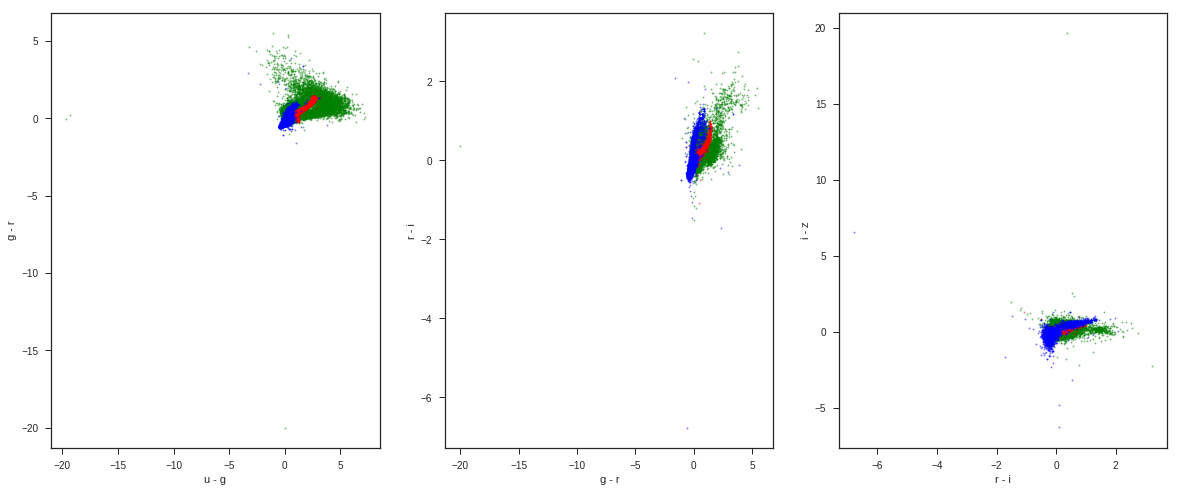

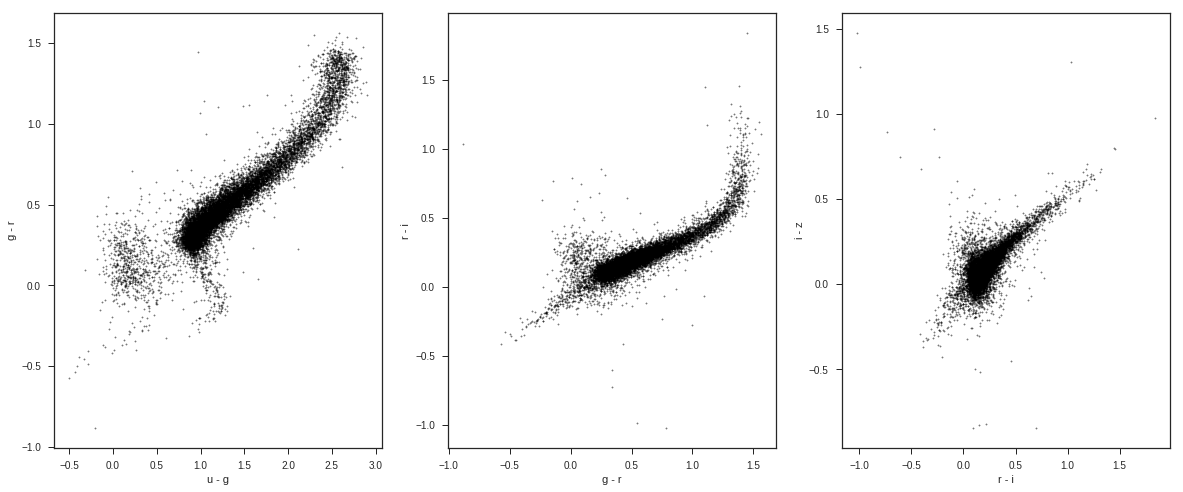

In [169]:
fig, ax = plt.subplots(ncols = len(diffs) - 1, figsize = (20, 8))
plotcols(ax, dfQSO, diffs, 'g')
plotcols(ax, dfstars, diffs, 'r')
plotcols(ax, dfWD, diffs, 'b')
fig, ax = plt.subplots(ncols = len(diffs) - 1, figsize = (20, 8))
plotcols(ax, dfSDSS, diffs, 'k')
